NAME: SAACHI CHANDRASHEKHAR

COURSE: USML FALL 2022

## **4. Document Clustering**

In [1]:
# Import all libraries
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download any package required
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Q1. Download dataset**

In [3]:
# Downloading the data for only selected categories
dataset = fetch_20newsgroups(
remove =('headers ', 'footers ', 'quotes '),
subset='all',
categories =['comp.graphics', 'rec.autos', 'rec.sport.baseball',
             'sci.space', 'talk.politics.mideast'])



In [4]:
# Checking number of documents
len(dataset.data)

4884

In [5]:
# Clean text by removing stop words, punctuations, links, and lemmatize the words
stopword = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
for i in range(len(dataset.data)):
    word_list = word_tokenize(dataset.data[i])
    lemmatized_doc = ""
    for word in word_list:
      word = word.lower()
      word = re.sub(r"http\S+", "", word)
      word = re.sub(r"www.\S+", "", word)
      word = "".join([char for char in word if char not in string.punctuation])
      cleaned = " ".join([x for x in re.split('\W+', word)
        if x not in stopword])
      lemmatized_doc = lemmatized_doc + " " + lemmatizer.lemmatize(cleaned)
    dataset.data[i] = lemmatized_doc 

In [6]:
# Snippet of the cleaned data
dataset.data[1]

'   hasan  mcrcimmcgilledu subject    islam border v israeli border originator  hasan  haleymcrcimmcgilledu nntppostinghost  haleymcrcimmcgilledu organization  mcgill research centre  intelligent machine line  51  article  1993apr520280027705  wamumdedu   spinoza  next06worwamumdedu  yon bonnie laird  cairn robbing  writes     article  c50wjjj4r  newsflashconcordiaca  ilyess  ececoncordiaca    ilyess bdira  writes      1    jew   nt even believe  god     case  many      founder  secular zionism    right  palestine       inhabitant  palestine    god gave   land    gd  nothing         land   fact given     jew   united nation  quite  bit    purchased  arab   absentee landlord  present claim  based  prior ownership  purchase    aforementioned absentee landlord  award   united nation     partition   palestine mandate territory     result    defensive war fought   egyptian  syrian  jordanian  et al            2       speak   west bank          inhabitant   jew    want   part  israel    firs

**Q2. Use TfIdfVectorizor**

In [7]:
# Getting data in vector format
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(dataset.data)
vectors.shape

(4884, 57666)

In [8]:
dataset.target.shape

(4884,)

**Q3. Use various clustering algorithms**

In [9]:
# Defining X and y variables
X = vectors
y = dataset.target 

# Function to get average of list elements
def average(lst):
  avg = sum(lst) / len(lst)
  return avg

# Creating dense matrix variable
dense_mat = X.toarray()

**K MEANS CLUSTERING**

In [10]:
# K MEANS CLUSTERING

# Initializing variables to use for the different clustering algorithms
rand = 10
score_homog = []
score_complete = []
score_vmeasure = []
score_rand = []
score_sil = []
time_lst = []

for i in range(5):
  t0 = time()
  km = KMeans(n_clusters=5, random_state=rand)
  km.fit(X)
  homog_score = metrics.homogeneity_score(y, km.labels_)
  complete_score = metrics.completeness_score(y, km.labels_)
  vmeasure_score = metrics.v_measure_score(y, km.labels_)
  rand_score = metrics.adjusted_rand_score(y, km.labels_)
  sil_score = metrics.silhouette_score(X, km.labels_)
  score_homog.append(homog_score)
  score_complete.append(complete_score)
  score_vmeasure.append(vmeasure_score)
  score_rand.append(rand_score)
  score_sil.append(sil_score)
  times = time() - t0
  time_lst.append(times)
  rand = rand + 15


avg_km_homog = average(score_homog)
std_km_homog = np.std(score_homog)
avg_km_complete = average(score_complete)
std_km_complete = np.std(score_complete)
avg_km_vmeasure = average(score_vmeasure)
std_km_vmeasure = np.std(score_vmeasure)
avg_km_rand = average(score_rand)
std_km_rand = np.std(score_rand)
avg_km_sil = average(score_sil)
std_km_sil = np.std(score_sil)
time_km = average(time_lst)
std_time_km = np.std(time_lst)



**SPECTRAL CLUSTERING**

In [11]:
# SPECTRAL CLUSTERING

# Initializing variables to use for the different clustering algorithms
rand = 10
score_homog = []
score_complete = []
score_vmeasure = []
score_rand = []
score_sil = []
time_lst = []

for i in range(5):
  t0 = time()
  spec = SpectralClustering(n_clusters=5,assign_labels='discretize',random_state=rand)
  spec.fit(X)
  homog_score = metrics.homogeneity_score(y, spec.labels_)
  complete_score = metrics.completeness_score(y, spec.labels_)
  vmeasure_score = metrics.v_measure_score(y, spec.labels_)
  rand_score = metrics.adjusted_rand_score(y, spec.labels_)
  sil_score = metrics.silhouette_score(X, spec.labels_)
  score_homog.append(homog_score)
  score_complete.append(complete_score)
  score_vmeasure.append(vmeasure_score)
  score_rand.append(rand_score)
  score_sil.append(sil_score)
  times = time() - t0
  time_lst.append(times)
  rand = rand + 15


avg_spec_homog = average(score_homog)
std_spec_homog = np.std(score_homog)
avg_spec_complete = average(score_complete)
std_spec_complete = np.std(score_complete)
avg_spec_vmeasure = average(score_vmeasure)
std_spec_vmeasure = np.std(score_vmeasure)
avg_spec_rand = average(score_rand)
std_spec_rand = np.std(score_rand)
avg_spec_sil = average(score_sil)
std_spec_sil = np.std(score_sil)
time_spec = average(time_lst)
std_time_spec = np.std(time_lst)


**AGGLOMERATIVE CLUSTERING**

In [12]:
# AGGLOMERATIVE CLUSTERING

# Initializing variables to use for the different clustering algorithms

score_homog = []
score_complete = []
score_vmeasure = []
score_rand = []
score_sil = []
time_lst = []

for i in range(1):
  t0 = time()
  aglo = AgglomerativeClustering(n_clusters=5)
  aglo.fit(dense_mat)
  homog_score = metrics.homogeneity_score(y, aglo.labels_)
  complete_score = metrics.completeness_score(y, aglo.labels_)
  vmeasure_score = metrics.v_measure_score(y, aglo.labels_)
  rand_score = metrics.adjusted_rand_score(y, aglo.labels_)
  sil_score = metrics.silhouette_score(X, aglo.labels_)
  score_homog.append(homog_score)
  score_complete.append(complete_score)
  score_vmeasure.append(vmeasure_score)
  score_rand.append(rand_score)
  score_sil.append(sil_score)
  times = time() - t0
  time_lst.append(times)



avg_aglo_homog = average(score_homog)
std_aglo_homog = np.std(score_homog)
avg_aglo_complete = average(score_complete)
std_aglo_complete = np.std(score_complete)
avg_aglo_vmeasure = average(score_vmeasure)
std_aglo_vmeasure = np.std(score_vmeasure)
avg_aglo_rand = average(score_rand)
std_aglo_rand = np.std(score_rand)
avg_aglo_sil = average(score_sil)
std_aglo_sil = np.std(score_sil)
time_aglo = average(time_lst)
std_time_aglo = np.std(time_lst)



**Q4. Clustering evaluation metrics**

In [13]:
print("KM Metrics")
print("Average and STDEV Homogeneity Score:", avg_km_homog, std_km_homog)
print("Average and STDEV Completeness Score:", avg_km_complete, std_km_complete)
print("Average and STDEV V-measure Score:", avg_km_vmeasure, std_km_vmeasure)
print("Average and STDEV Adjusted Rand index Score:", avg_km_rand, std_km_rand)
print("Average and STDEV Silhouette Score:", avg_km_sil, std_km_sil)
print("Average time:", time_km, "seconds")

KM Metrics
Average and STDEV Homogeneity Score: 0.5274124338685797 0.03190090539349215
Average and STDEV Completeness Score: 0.6475325949374943 0.030913137796630016
Average and STDEV V-measure Score: 0.5809250261078012 0.02865843166350452
Average and STDEV Adjusted Rand index Score: 0.39857803470779374 0.06256185729375041
Average and STDEV Silhouette Score: 0.007063417293039229 0.00010330240542546145
Average time: 5.372044324874878 seconds


In [14]:
print("Spectral Metrics")
print("Average and STDEV Homogeneity Score:", avg_spec_homog, std_spec_homog)
print("Average and STDEV Completeness Score:", avg_spec_complete, std_spec_complete)
print("Average and STDEV V-measure Score:", avg_spec_vmeasure, std_spec_vmeasure)
print("Average and STDEV Adjusted Rand index Score:", avg_spec_rand, std_spec_rand)
print("Average and STDEV Silhouette Score:", avg_spec_sil, std_spec_sil)
print("Average time:", time_spec, "seconds")

Spectral Metrics
Average and STDEV Homogeneity Score: 0.4712092088594762 3.510833468576701e-17
Average and STDEV Completeness Score: 0.568811582439493 8.599750569898517e-17
Average and STDEV V-measure Score: 0.5154305721458818 1.1102230246251565e-16
Average and STDEV Adjusted Rand index Score: 0.32593521498101774 0.0
Average and STDEV Silhouette Score: 0.006456318760623546 0.0
Average time: 8.147219133377074 seconds


In [15]:
print("Agglomerative Metrics")
print("Average and STDEV Homogeneity Score:", avg_aglo_homog, std_aglo_homog)
print("Average and STDEV Completeness Score:", avg_aglo_complete, std_aglo_complete)
print("Average and STDEV V-measure Score:", avg_aglo_vmeasure, std_aglo_vmeasure)
print("Average and STDEV Adjusted Rand index Score:", avg_aglo_rand, std_aglo_rand)
print("Average and STDEV Silhouette Score:", avg_aglo_sil, std_aglo_sil)
print("Average time:", time_aglo, "seconds")

Agglomerative Metrics
Average and STDEV Homogeneity Score: 0.5057322101765919 0.0
Average and STDEV Completeness Score: 0.6308483686781696 0.0
Average and STDEV V-measure Score: 0.5614038207469265 0.0
Average and STDEV Adjusted Rand index Score: 0.36931110750082885 0.0
Average and STDEV Silhouette Score: 0.006629038118728745 0.0
Average time: 495.69961190223694 seconds


1. **Homogeneity:** This score checks whether a cluster contains only samples belonging to a single class. It's bounded between 0 and 1, with low values indicating a low homogeneity. The higher the value, the more homogenous the clusters are. We see that values are in the order: KMeans > Agglomerative > Spectral which means **KMeans has more homogenous clusters** than the other 2 algorithms.

2. **Completeness:** A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. Scores are between 0.0 and 1.0 where 1.0 stands for perfectly complete labeling.We see that values are in the order: KMeans > Agglomerative > Spectral which means **KMeans has more complete labelling** than the other 2 algorithms.

3. **V-measure:** The V-measure is the harmonic mean between homogeneity and completeness. The score is between 0.0 and 1.0 with 1.0 stands for perfectly complete labeling. Here as well, **KMeans** has a better score than the rest.

4. **Adjusted Rand index:** This score is used to determine whether two cluster results are similar to each other. The scores are between -1.0 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match. **KMeans** has the higher score. 

5. **Silhouette:** It is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. The values for all 3 algorithms is very small, close to 0 which means that most have overlapping clusters. **KMeans** has a slightly better value than the others.


**Q5. Plot avg score and Stddev for all metrics for algorithms**

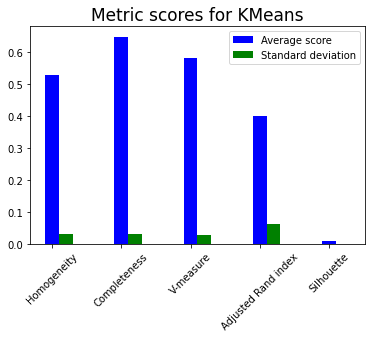

In [16]:
avg_km_metrics = {"Homogeneity": avg_km_homog, "Completeness": avg_km_complete,
                   "V-measure":avg_km_vmeasure, "Adjusted Rand index":avg_km_rand, 
                   "Silhouette":avg_km_sil }
std_km_metrics = {"Homogeneity": std_km_homog, "Completeness": std_km_complete,
                   "V-measure":std_km_vmeasure, "Adjusted Rand index":std_km_rand, 
                   "Silhouette":std_km_sil }

X_axis = np.arange(len(avg_km_metrics))
ax = plt.subplot(111)
ax.bar(X_axis, avg_km_metrics.values(), width=0.2, color='b', align='center', label = "Average score")
ax.bar(X_axis+0.2, std_km_metrics.values(), width=0.2, color='g', align='center', label = "Standard deviation")
plt.xticks(X_axis, avg_km_metrics.keys(), rotation = 45)
plt.title("Metric scores for KMeans", fontsize=17)
plt.legend()
plt.show()

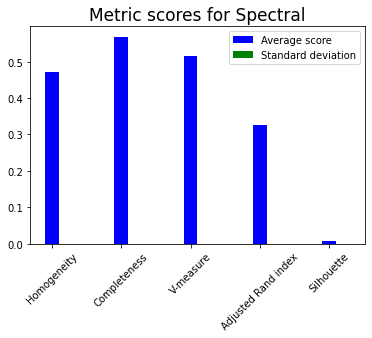

In [17]:
avg_spec_metrics = {"Homogeneity": avg_spec_homog, "Completeness": avg_spec_complete,
                   "V-measure":avg_spec_vmeasure, "Adjusted Rand index":avg_spec_rand, 
                   "Silhouette":avg_spec_sil }
std_spec_metrics = {"Homogeneity": std_spec_homog, "Completeness": std_spec_complete,
                   "V-measure":std_spec_vmeasure, "Adjusted Rand index":std_spec_rand, 
                   "Silhouette":std_spec_sil }

X_axis = np.arange(len(avg_spec_metrics))
ax = plt.subplot(111)
ax.bar(X_axis, avg_spec_metrics.values(), width=0.2, color='b', align='center', label = "Average score")
ax.bar(X_axis+0.2, std_spec_metrics.values(), width=0.2, color='g', align='center', label = "Standard deviation")
plt.xticks(X_axis, avg_spec_metrics.keys(), rotation = 45)
plt.title("Metric scores for Spectral", fontsize=17)
plt.legend()
plt.show()

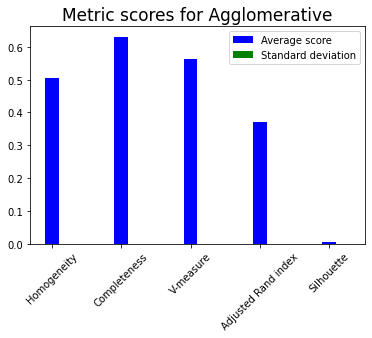

In [18]:
avg_aglo_metrics = {"Homogeneity": avg_aglo_homog, "Completeness": avg_aglo_complete,
                   "V-measure":avg_aglo_vmeasure, "Adjusted Rand index":avg_aglo_rand, 
                   "Silhouette":avg_aglo_sil }
std_aglo_metrics = {"Homogeneity": std_aglo_homog, "Completeness": std_aglo_complete,
                   "V-measure":std_aglo_vmeasure, "Adjusted Rand index":std_aglo_rand, 
                   "Silhouette":std_aglo_sil }

X_axis = np.arange(len(avg_aglo_metrics))
ax = plt.subplot(111)
ax.bar(X_axis, avg_aglo_metrics.values(), width=0.2, color='b', align='center', label = "Average score")
ax.bar(X_axis+0.2, std_aglo_metrics.values(), width=0.2, color='g', align='center', label = "Standard deviation")
plt.xticks(X_axis, avg_aglo_metrics.keys(), rotation = 45)
plt.title("Metric scores for Agglomerative", fontsize=17)
plt.legend()
plt.show()                  

As agglomerative runs only once, there is no standard deviation values.

**Q6. Plot avg running time and Stddev for all algorithms**

In [19]:
time_mean = {"KMeans": time_km, "Spectral": time_spec, "Agglomerative": time_aglo}
time_std = {"KMeans": std_time_km, "Spectral": std_time_spec, "Agglomerative": std_time_aglo}

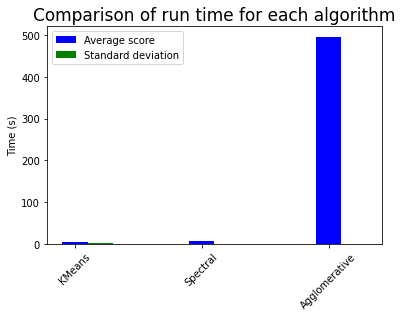

In [23]:
X_axis = np.arange(len(time_mean))
ax = plt.subplot(111)
ax.bar(X_axis, time_mean.values(), width=0.2, color='b', align='center', label = "Average score")
ax.bar(X_axis+0.2, time_std.values(), width=0.2, color='g', align='center', label = "Standard deviation")
ax.legend(('Pre Accuracy','Post Accuracy'))
plt.xticks(X_axis, time_mean.keys(), rotation = 45)
plt.ylabel("Time (s)")
plt.title("Comparison of run time for each algorithm", fontsize=17)
plt.legend()
plt.show()  

We see that **agglomerative** clustering takes a much higher time than KMeans or Spectral. This is probably due to the fact that agglomerative clustering requires the use of a dense matrix and the others use a sparse matrix.

**Q7. 10 most influential words in KMeans**

In [21]:
km = KMeans(n_clusters=5, init='k-means++', max_iter=100)
km.fit(X)

KMeans(max_iter=100, n_clusters=5)

In [22]:
centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: game team player nt baseball year run hit win pitcher
Cluster 1: space line subject organization would nt university image nntppostinghost writes
Cluster 2: car nt engine oil writes would article dealer line one
Cluster 3: israel israeli arab jew muslim jake palestinian jewish people right
Cluster 4: armenian turkish armenia serdar turk argic greek turkey genocide people


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


We see the top 10 words from each cluster. 

1. Cluster 0 looks like the cluster for 'rec.sport.baseball' data as the words are mainly game related.
2. Cluster 1 looks like the cluster for 'sci.space' data or 'comp.graphics' data.
3. Cluster 2 looks like the cluster for 'rec.autos' data as it mentions cars, engines,
4. Cluster 3 and 4 look like clusters for 'talk.politics.mideast' data. 


This shows that there might be overlapping of clusters using KMeans

**Q8. Discuss the results**

From the evaluation metrics, we see that KMeans gets much better scores compared to the other two algorithms. However, KMeans also doesn't do an extremely good job in the clustering as there might be overlapping clusters. 

The second best in terms of metric scores is Agglomerative but the biggest downside to this algorithm is that it takes a very long time for it to fit on the data. So using this algorithm on huge amount of data might be very time consuming.